In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# loading datasets
actives = pd.read_csv('../../mold2_descriptors/2242_actives.csv')
inactives = pd.read_csv('../../mold2_descriptors/2242_inactives.csv')

In [3]:
print('actives:', len(actives))
print('inactives:', len(inactives))

actives: 715
inactives: 183379


In [4]:
# spliting datasets into test - train & validation
actives_test = actives.sample(n=300, random_state=42)
actives_train = actives.drop(actives_test.index)
inactives_test = inactives.sample(n=300, random_state=42)
inactives_train = inactives.drop(inactives_test.index)

inactives_train = inactives_train.sample(n=865)

In [5]:
df = pd.concat([actives_train, inactives_train], ignore_index=True)

In [6]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,4.16993,-0.044232,0.000000,0.541902,0
1,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,5.00000,-0.155250,0.230769,1.353090,0
2,1,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,5.39232,-0.639251,0.176471,3.076670,0
3,1,0,0,1,2,0,0,0,0,0,...,0,1,0,0,0,4.75489,-0.708960,0.300000,2.423190,0
4,1,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.24793,-0.750851,0.214286,1.454110,0


In [7]:
X = df.drop(['activity'], axis=1)
y = df['activity']

In [8]:
y.value_counts()

0    865
1    415
Name: activity, dtype: int64

In [9]:
import matplotlib.pyplot as plt

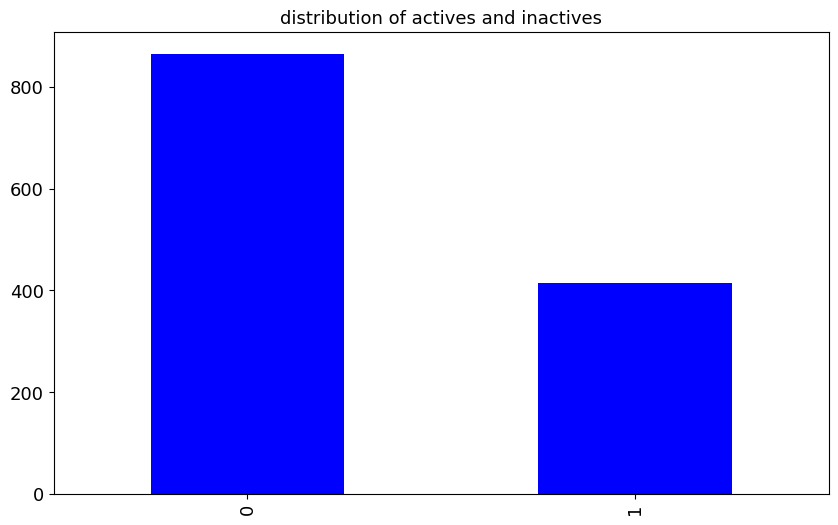

In [10]:
ax = y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='blue')
ax.set_title('distribution of actives and inactives', fontsize=13)
ax.set_alpha(0.5)

In [11]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.01, random_state=42)

In [12]:
# normalizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_validate = pd.DataFrame(X_validate, columns=X.columns)

### Removing low variance features to improve model performance

In [13]:
from sklearn.feature_selection import VarianceThreshold


thresh = VarianceThreshold(threshold=0.03)
thresh.fit(X_train)
mask = thresh.get_support()


X_train = X_train.loc[:, mask]
X_validate = X_validate.loc[:, mask]

X_train.shape, X_validate.shape

((1267, 616), (13, 616))

## training model with undersampled data

In [14]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

### evaluating the model using the test data

In [15]:
# getting the test dataset
testing_data = pd.concat([actives_test, inactives_test], ignore_index=True)

In [16]:
len(testing_data)

600

In [17]:
testing_data['activity'].value_counts()

1    300
0    300
Name: activity, dtype: int64

In [18]:
testing_data.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,1,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,4.954,-0.280,0.231,3.149,1
1,1,0,0,2,2,0,0,0,0,0,...,0,1,0,0,1,5.285,-0.234,0.214,0.636,1
2,2,0,0,2,2,0,0,0,0,0,...,0,2,0,0,0,5.170,-0.658,0.444,3.317,1
3,2,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,5.170,-0.823,0.444,3.307,1
4,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,4.858,-0.717,0.000,1.820,1


In [19]:
testing_data_x = testing_data.drop(['activity'], axis=1)
print(len(testing_data_x))
testing_data_x = scaler.transform(testing_data_x)
testing_data_y = testing_data['activity']

600


In [20]:
testing_data_x = pd.DataFrame(testing_data_x, columns=X.columns)

In [21]:
testing_data_x = testing_data_x.loc[:, mask]

In [22]:
testing_data_x.head()

,D001,D002,D003,D004,D005,D006,D007,D011,D012,D013,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,-0.430773,-0.081368,-0.062944,0.245386,0.805881,-0.105703,-0.028105,-0.028105,-0.941317,1.380478,...,-0.148615,-0.028105,-0.542219,-0.216103,-0.039762,-0.183623,-0.283049,1.015913,-0.430244,0.828101
1,-0.430773,-0.081368,-0.062944,1.562777,-0.279189,-0.105703,-0.028105,-0.028105,0.459876,1.380478,...,-0.148615,-0.028105,1.319547,-0.216103,-0.039762,4.986385,0.559829,1.171609,-0.537579,-1.231672
2,0.862567,-0.081368,-0.062944,1.562777,-0.279189,-0.105703,-0.028105,-0.028105,0.693408,0.902983,...,-0.148615,-0.028105,3.181313,-0.216103,-0.039762,-0.183623,0.266986,-0.263499,0.914601,0.965801
3,0.862567,-0.081368,-0.062944,1.562777,-0.279189,-0.105703,-0.028105,-0.028105,0.693408,-0.052008,...,-0.148615,-0.028105,-0.542219,-0.216103,-0.039762,-0.183623,0.266986,-0.821973,0.914601,0.957605
4,-1.724114,-0.081368,-0.062944,0.245386,-1.364260,-0.105703,-0.028105,-0.028105,-1.408382,-1.006999,...,-0.148615,-0.028105,1.319547,-0.216103,-0.039762,-0.183623,-0.527509,-0.463196,-1.888738,-0.261210


In [23]:
model.predict((testing_data_x.iloc[500]).to_numpy().reshape(1, -1))

c:\Users\dopew\Desktop\fyp\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
# converting the test dataset into a numpy array
testing_data_x = testing_data_x.to_numpy()

#### Model's accuracy on test set

In [25]:
model.score(testing_data_x, testing_data_y)

c:\Users\dopew\Desktop\fyp\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.97

### evaluating model's performance with F1 score, precision, recall, etc

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
y_pred = model.predict_proba(testing_data_x)[:, 1]
y_pred_rounded = (y_pred > 0.5).astype(int)
y_pred_rounded.shape == y_pred.shape

c:\Users\dopew\Desktop\fyp\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


True

In [28]:
testing_data_y.shape == y_pred.shape

True

In [29]:
accuracy = accuracy_score(testing_data_y, y_pred_rounded)
precision = precision_score(testing_data_y, y_pred_rounded)
recall = recall_score(testing_data_y, y_pred_rounded)
f1 = f1_score(testing_data_y, y_pred_rounded)

In [30]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))

accuracy is 0.97
precision is 0.9895833333333334
recall is 0.95
f1 is 0.9693877551020408
